In [131]:
# Used for plotting data
%matplotlib inline
import matplotlib.pyplot as plt
# Used for data storage and manipulation 
import numpy as np
import pandas as pd
# Used for Regression Modelling
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
# Used for Acc metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# For stepwise regression
import statsmodels.api as sm
# box plots
import seaborn as sns
# pairplot
from seaborn import pairplot
# Correlation plot
from statsmodels.graphics.correlation import plot_corr

In [132]:
df = pd.read_csv("dataCSV_v2.csv", low_memory=False, delimiter=';')
pd.options.display.max_columns = None
df = df.drop(columns=['Self identification ', 'Spierpercentage ', 'Fat percentage ', 'Botmassa'])
df = df.dropna(subset=['RFEImean', 'VLEImean'])
df = df[df.isnull().sum(axis=1) < 4]
df = df.fillna(0)
df = df.astype(str)
df = df.apply(lambda x: x.str.replace('#LEEG!','0'))
df = df.apply(lambda x: x.str.replace('-99','0'))
df = df.apply(lambda x: x.str.replace('-96','0'))
df = df.apply(lambda x: x.str.replace(',','.'))
df = df.astype(float)
df = df[df.RFEImean != 0]
df = df[df.VLEImean != 0]
df.sample(20)

,volgcode,age_at_V1,BMI,BMI4category,V1_upperleg_length,V1_upperleg_cir,TMTBminA,TMTBdeelA,V2_TMT_partA,V2_TMT_partB,V2_SCWT_score,V2_LFT_score,RFMTmean,RFCSAmean,RFEImean,VLMTmean,VLCSAmean,VLEImean,RV2_TMT_A,RV2_TMT_B,RV2_SCWT,RV2_LFT_,RTMTBmin,RTMTBdee,MeanCognitive,Gender,Leefsituatie,Educatie,Roken,Metabolic age
37,110053.0,73.0,36.40,4.0,40.0,59.5,54.0,2.10,49.0,103.0,34.0,29.0,1.695,6.499,65.086,2.944,22.071,39.856,0.7816,0.5301,0.2035,0.2356,0.4880,0.3133,0.43,0.0,1.0,1.0,3.0,87.0
30,110046.0,85.0,35.75,4.0,34.0,49.5,203.0,6.08,40.0,243.0,88.0,29.0,1.189,2.879,51.506,2.233,18.237,54.972,0.5690,0.8434,0.8488,0.2356,0.8554,0.9157,0.71,1.0,0.0,3.0,3.0,0.0
92,110108.0,75.0,30.80,4.0,44.0,61.0,5.0,1.08,59.0,64.0,91.5,39.0,0.807,3.161,56.193,2.486,15.235,40.342,0.9310,0.1988,0.8605,0.5747,0.0120,0.0120,0.43,0.0,2.0,3.0,2.0,81.0
38,110054.0,69.0,27.40,3.0,36.4,54.4,220.0,4.14,70.0,290.0,31.5,40.0,1.289,4.852,48.740,1.840,11.931,30.388,0.9885,0.8916,0.1279,0.6264,0.8675,0.6988,0.70,1.0,0.0,2.0,1.0,54.0
67,110083.0,70.0,32.00,4.0,31.6,53.3,30.0,1.81,37.0,67.0,26.0,50.0,0.889,2.399,70.307,1.962,10.833,69.564,0.4828,0.2410,0.0349,0.8391,0.1807,0.1566,0.32,0.0,1.0,3.0,2.0,78.0
18,110034.0,77.0,29.20,3.0,43.2,56.6,13.0,1.20,65.0,78.0,55.5,35.0,1.086,3.863,55.911,1.588,9.642,71.202,0.9655,0.3735,0.5233,0.4253,0.0602,0.0361,0.40,1.0,1.0,2.0,2.0,62.0
21,110037.0,79.0,35.00,4.0,35.2,52.1,232.0,4.68,63.0,295.0,54.5,30.0,0.862,6.172,66.613,1.738,8.618,68.757,0.9540,0.9036,0.4884,0.2759,0.8976,0.7711,0.72,0.0,1.0,2.0,2.0,81.0
29,110045.0,69.0,26.30,3.0,36.4,49.8,47.0,2.74,27.0,74.0,13.0,43.0,0.978,3.013,61.189,2.150,18.708,67.898,0.1379,0.3072,0.0233,0.7299,0.4217,0.5301,0.36,0.0,1.0,4.0,3.0,54.0
44,110060.0,71.0,24.10,2.0,44.6,50.2,45.0,2.41,32.0,77.0,49.5,32.0,1.002,5.671,61.812,1.816,13.377,65.185,0.3276,0.3614,0.4186,0.3448,0.3916,0.4337,0.38,0.0,1.0,4.0,2.0,56.0
61,110077.0,82.0,24.60,2.0,46.0,49.0,170.0,6.00,34.0,204.0,96.5,30.0,0.797,2.736,65.989,1.796,8.787,68.785,0.4138,0.8012,0.8837,0.2759,0.8012,0.9036,0.68,0.0,1.0,1.0,3.0,0.0


In [133]:
X = pd.DataFrame(df, columns = ['volgcode', 'Gender ', 'Leefsituatie ', 'Educatie ', 'Roken ', 'Metabolic age ', 'age_at_V1', 'BMI','BMI4category', 'V1_upperleg_length', 'V1_upperleg_cir', 'RFMTmean', 'RFCSAmean', 'VLMTmean', 'VLCSAmean'])
y = pd.DataFrame(df, columns=['RFEImean'])
y2 = pd.DataFrame(df, columns=['VLEImean'])

# RFEImean

In [134]:
# WITH a random_state parameter:
#  (Same split every time! Note you can change the random state to any integer.)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)
# Create linear regression model
lin_reg_mod = LinearRegression()
# Fit linear regression
lin_reg_mod.fit(X_train, y_train)
# Make prediction on the testing data
pred = lin_reg_mod.predict(X_test)

In [135]:
# Calculate the R^2 or coefficent of determination between the actual & predicted
test_set_r2 = r2_score(y_test, pred)
# The closer towards 1, the better the fit
print(test_set_r2)

0.03298655607516421


In [136]:
# Calculate the Root Mean Square Error between the actual & predicted
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
# Note that for rmse, the lower that value is, the better the fit
print(test_set_rmse)

9.88503946954887


In [137]:
df_results = y_test
df_results['Predicted'] = pred.ravel()
df_results['Residuals'] = abs(df_results['RFEImean']) - abs(df_results['Predicted'])
print(df_results)

     RFEImean  Predicted  Residuals
46     62.239  59.364926   2.874074
53     62.505  60.298647   2.206353
32     76.445  57.951780  18.493220
48     56.324  51.310627   5.013373
43     71.163  63.409745   7.753255
98     54.118  66.265082 -12.147082
71     45.056  62.757470 -17.701470
82     61.369  60.522501   0.846499
103    54.505  63.558258  -9.053258
69     74.372  57.760361  16.611639
80     53.167  53.270788  -0.103788
63     56.594  63.837054  -7.243054
57     75.985  76.305827  -0.320827
79     68.093  68.514914  -0.421914
76     57.913  41.355738  16.557262
13     43.121  45.459930  -2.338930
2      48.469  56.768306  -8.299306


<ipython-input-137-467e01ed1105>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['Predicted'] = pred.ravel()
<ipython-input-137-467e01ed1105>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['Residuals'] = abs(df_results['RFEImean']) - abs(df_results['Predicted'])


Text(0.5, 1.0, 'Actual vs. Predicted')

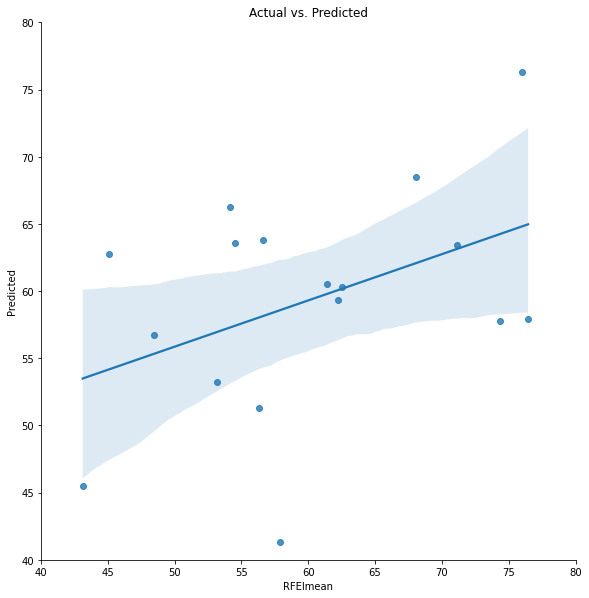

In [138]:
# Plotting the actual vs predicted values
sns.lmplot(x='RFEImean', y='Predicted', data=df_results, height=8).set(ylim=(40, 80), xlim=(40, 80))

plt.title('Actual vs. Predicted')

# VLEImean

In [139]:
# WITH a random_state parameter:
#  (Same split every time! Note you can change the random state to any integer.)
X_train, X_test, y_train, y_test = train_test_split(X, y2, random_state=1, test_size=0.2)
# Create linear regression model
lin_reg_mod = LinearRegression()
# Fit linear regression
lin_reg_mod.fit(X_train, y_train)
# Make prediction on the testing data
pred = lin_reg_mod.predict(X_test)

In [140]:
# Calculate the R^2 or coefficent of determination between the actual & predicted
test_set_r2 = r2_score(y_test, pred)
# The closer towards 1, the better the fit
print(test_set_r2)

-0.5659671528409229


In [141]:
# Calculate the Root Mean Square Error between the actual & predicted
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
# Note that for rmse, the lower that value is, the better the fit
print(test_set_rmse)

13.016941376839066


In [142]:
df_results = y_test
df_results['Predicted'] = pred.ravel()
df_results['Residuals'] = abs(df_results['VLEImean']) - abs(df_results['Predicted'])
print(df_results)

     VLEImean  Predicted  Residuals
46     67.631  61.243238   6.387762
53     61.237  64.349893  -3.112893
32     63.264  47.024050  16.239950
48     52.298  50.176221   2.121779
43     72.406  70.803530   1.602470
98     40.228  63.554100 -23.326100
71     59.644  52.774152   6.869848
82     58.393  60.432827  -2.039827
103    61.361  66.277429  -4.916429
69     83.429  55.585800  27.843200
80     42.403  60.059496 -17.656496
63     60.640  52.522193   8.117807
57     46.565  68.822540 -22.257540
79     69.450  64.068398   5.381602
76     55.349  47.863957   7.485043
13     56.773  42.433013  14.339987
2      61.616  60.813277   0.802723


<ipython-input-142-c068302c0b8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['Predicted'] = pred.ravel()
<ipython-input-142-c068302c0b8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['Residuals'] = abs(df_results['VLEImean']) - abs(df_results['Predicted'])


Text(0.5, 1.0, 'Actual vs. Predicted')

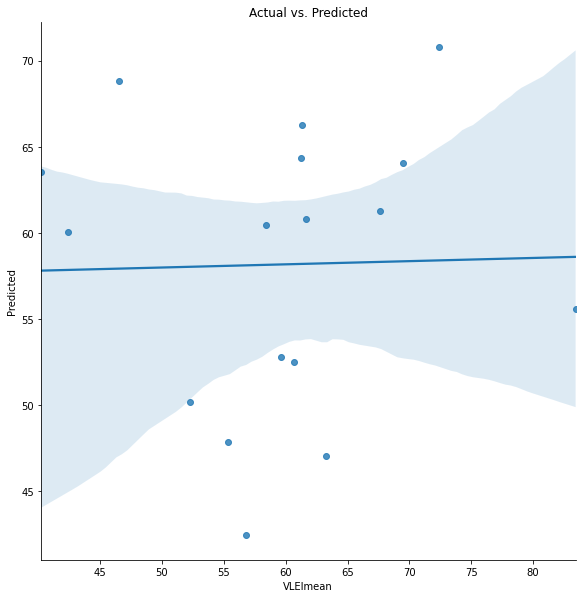

In [143]:
# Plotting the actual vs predicted values
sns.lmplot(x='VLEImean', y='Predicted', data=df_results, height=8)
plt.title('Actual vs. Predicted')